In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
from matplotlib import pyplot as plt
import numpy as np
from scipy import signal

# Simple signal

In [41]:
T = 1000 # number of timepoints in our timeseries

In [42]:
# let's make a nice timeseries with exactly ONE frequency in it
time = np.linspace(0, 2*np.pi, T)
ts1 = np.sin(100 * time)

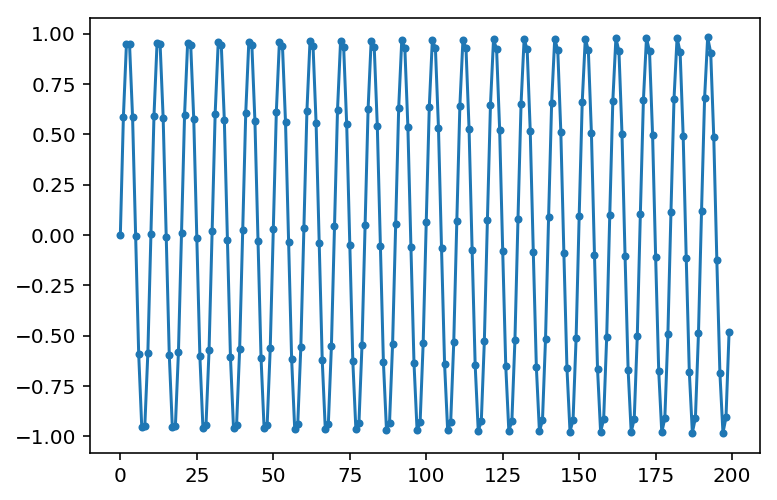

In [11]:
plt.plot(ts1[:200], '.-');

In [12]:
ts1_ft = np.fft.fft(ts1)

In [17]:
ts1.shape, ts1_ft.shape

((1000,), (1000,))

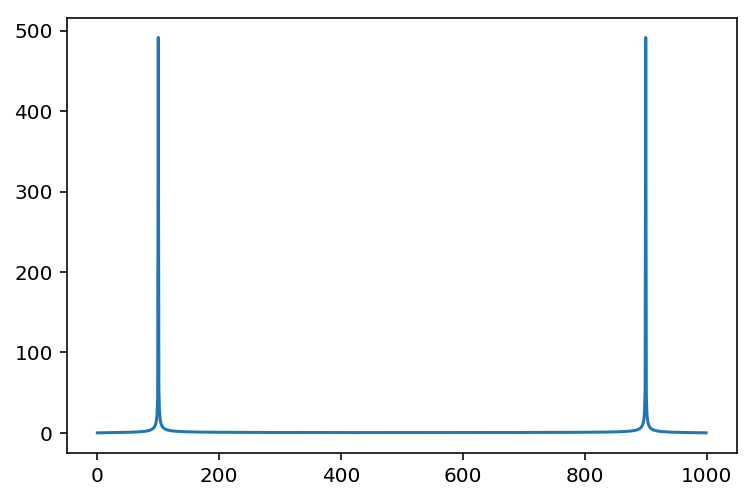

In [15]:
plt.plot(np.abs(ts1_ft));

In [18]:
# what frequency of sinusoid does each value in the
# fourier transform represent?
ts1_freqs = np.fft.fftfreq(len(ts1))
ts1_freqs

array([ 0.   ,  0.001,  0.002,  0.003,  0.004,  0.005,  0.006,  0.007,
        0.008,  0.009,  0.01 ,  0.011,  0.012,  0.013,  0.014,  0.015,
        0.016,  0.017,  0.018,  0.019,  0.02 ,  0.021,  0.022,  0.023,
        0.024,  0.025,  0.026,  0.027,  0.028,  0.029,  0.03 ,  0.031,
        0.032,  0.033,  0.034,  0.035,  0.036,  0.037,  0.038,  0.039,
        0.04 ,  0.041,  0.042,  0.043,  0.044,  0.045,  0.046,  0.047,
        0.048,  0.049,  0.05 ,  0.051,  0.052,  0.053,  0.054,  0.055,
        0.056,  0.057,  0.058,  0.059,  0.06 ,  0.061,  0.062,  0.063,
        0.064,  0.065,  0.066,  0.067,  0.068,  0.069,  0.07 ,  0.071,
        0.072,  0.073,  0.074,  0.075,  0.076,  0.077,  0.078,  0.079,
        0.08 ,  0.081,  0.082,  0.083,  0.084,  0.085,  0.086,  0.087,
        0.088,  0.089,  0.09 ,  0.091,  0.092,  0.093,  0.094,  0.095,
        0.096,  0.097,  0.098,  0.099,  0.1  ,  0.101,  0.102,  0.103,
        0.104,  0.105,  0.106,  0.107,  0.108,  0.109,  0.11 ,  0.111,
      

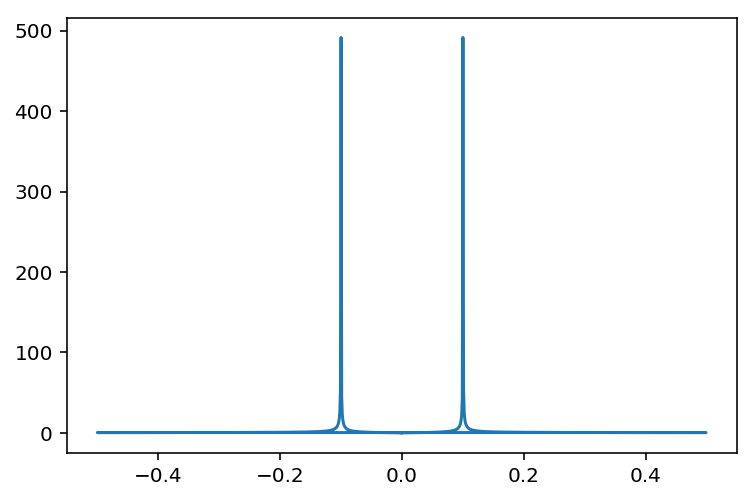

In [19]:
plt.plot(ts1_freqs, np.abs(ts1_ft));

# Slightly more complex signal

In [20]:
T

1000

In [21]:
# let's make a timeseries with exactly THREE frequencies in it!
ts2 = np.sin(100 * time) + 2 * np.sin(300 * time) + 3 * np.sin(20 * time)

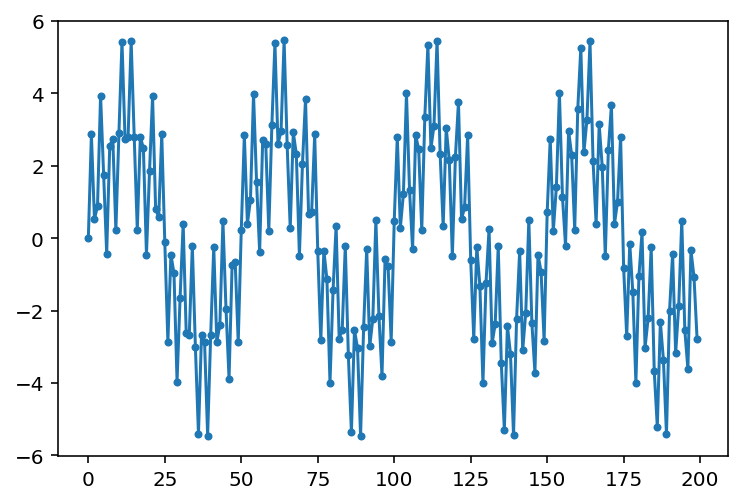

In [22]:
plt.plot(ts2[:200], '.-')

In [23]:
ts2_ft = np.fft.fft(ts2)
ts2_freqs = np.fft.fftfreq(len(ts2))

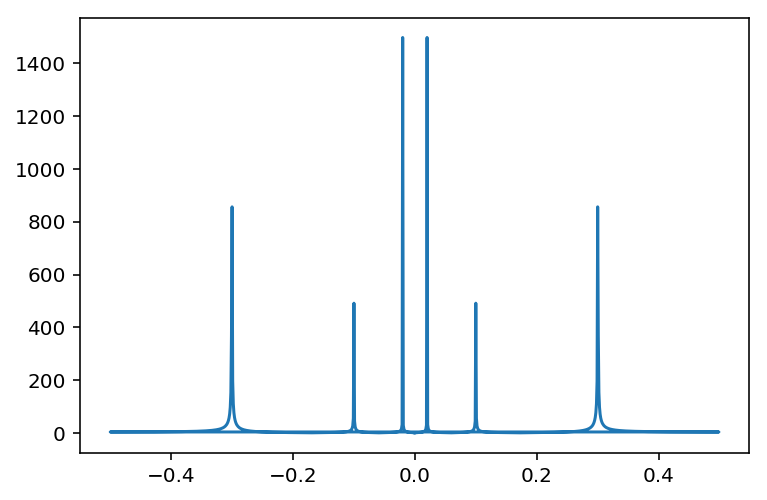

In [27]:
plt.plot(ts2_freqs, np.abs(ts2_ft))

(0, 0.5)

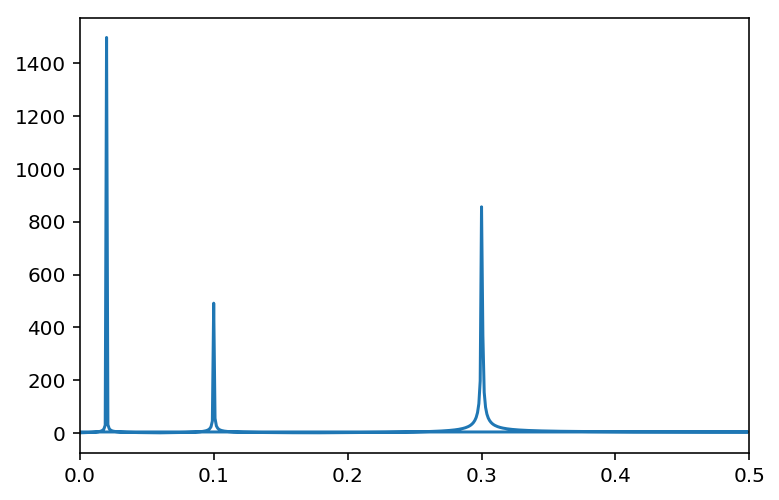

In [28]:
# ts2 = np.sin(100 * time) + 2 * np.sin(300 * time) + 3 * np.sin(20 * time)
plt.plot(ts2_freqs, np.abs(ts2_ft))
plt.xlim(0, 0.5)

# Why FFT is not great for real signals

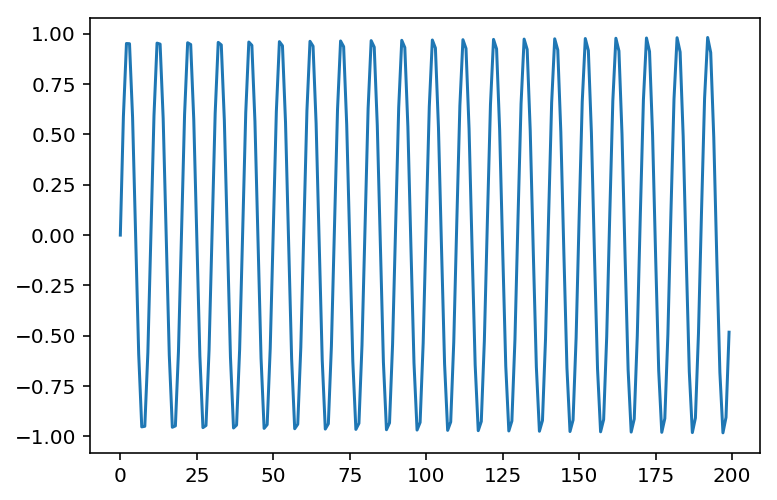

In [43]:
plt.plot(ts1[:200])

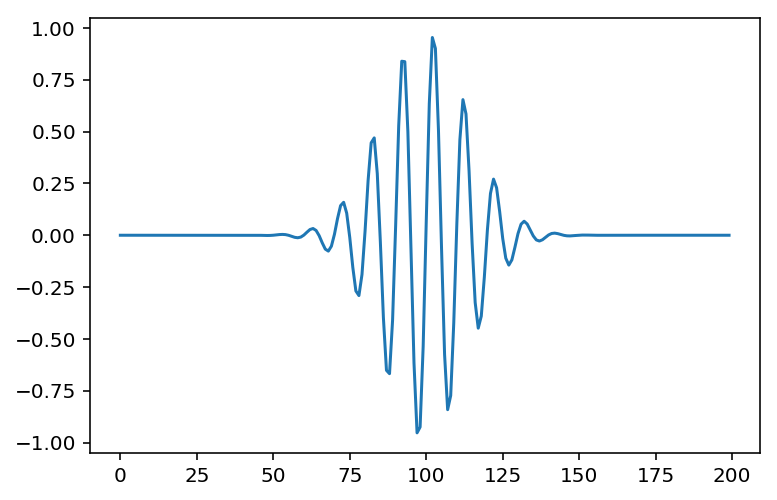

In [44]:
kernel = ts1[:200]
kernel *= np.exp(-np.linspace(-5, 5, 200)**2)
plt.plot(kernel)

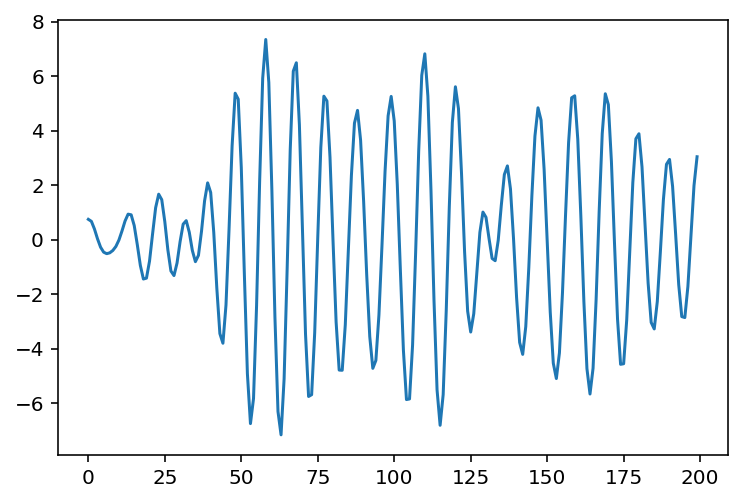

In [45]:
noise_ts1 = np.convolve(np.random.randn(T), kernel, 'same')
plt.plot(noise_ts1[:200])

(0, 0.5)

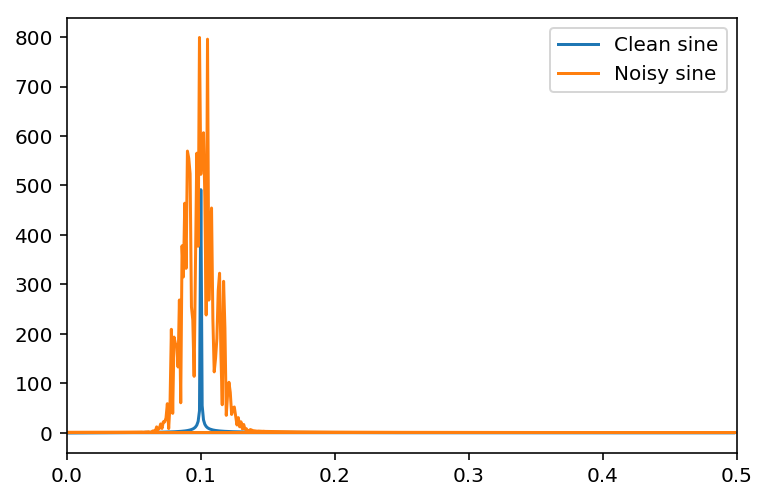

In [55]:
noise_ts1_ft = np.fft.fft(noise_ts1)

plt.plot(ts1_freqs, np.abs(ts1_ft), label='Clean sine')
plt.plot(ts1_freqs, np.abs(noise_ts1_ft), label='Noisy sine')
plt.legend();
plt.xlim(0, 0.5)

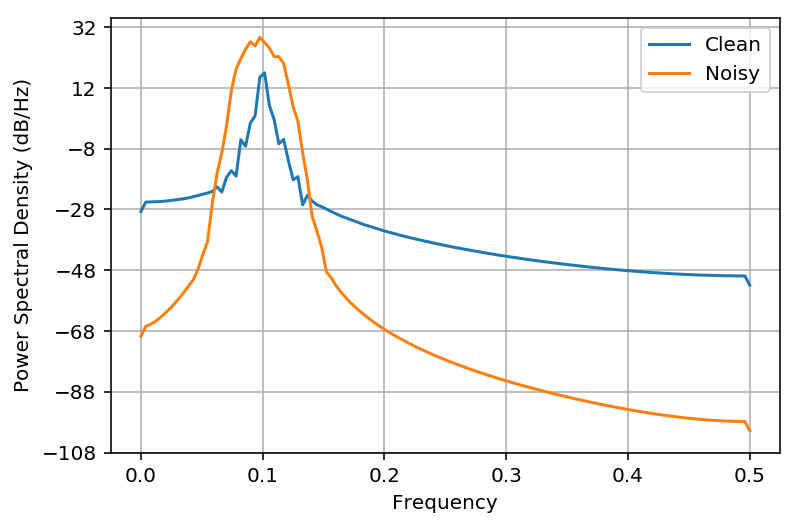

In [50]:
Pxx_ts1, freq_ts1 = plt.psd(ts1, Fs=1.0, label='Clean')
Pxx_noise_ts1, freq_noise_ts1 = plt.psd(noise_ts1, Fs=1.0, label='Noisy')
plt.legend()

# the "noisy" peak is now not a nasty jagged mess, it's just broader!
# yay!

# note that this is also on a logarithmic y-scale (decibels!)

(0, 0.5)

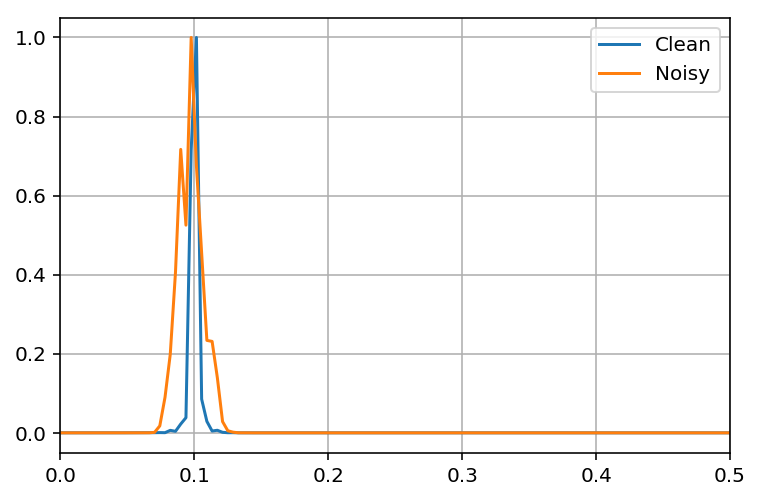

In [53]:
plt.plot(freq_ts1, Pxx_ts1/Pxx_ts1.max(), label='Clean')
plt.plot(freq_noise_ts1, Pxx_noise_ts1/Pxx_noise_ts1.max(), label='Noisy')
plt.grid()
plt.legend()
plt.xlim(0, 0.5)

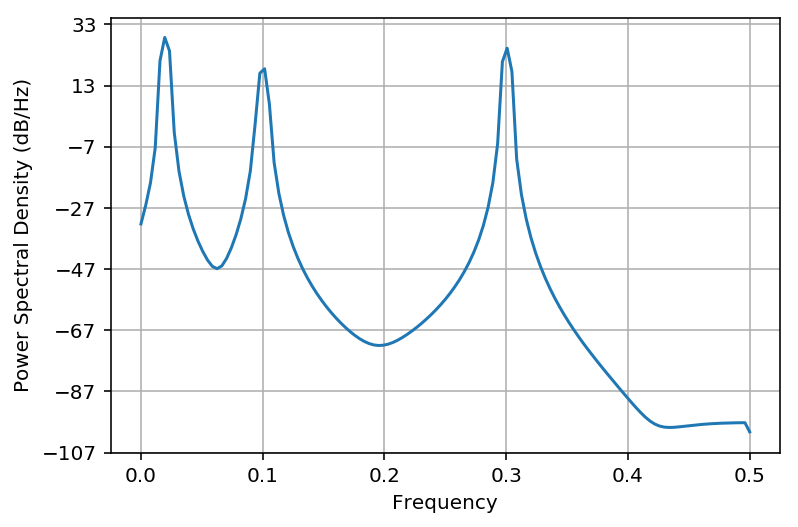

In [56]:
plt.psd(ts2, Fs=1.0); # 3 peaks, like before!